In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Bigger font
sns.set(font_scale=1.3)
plt.style.use('fivethirtyeight')
# Figure size®
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 2.5
rcParams['lines.marker'] = '.'
rcParams['lines.linewidth'] = 1
rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 10
rcParams['axes.titlesize'] = 16
# plt.rc('figure.subplot', wspace=.33)
# Slides
from notebook.services.config import ConfigManager
cm = ConfigManager()
# cm.update('livereveal', {'width': 1024, 'height': 768, 'scroll': True, 'theme': 'simple', 'transition': 'linear'});
# np.random.seed(123)

from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"  # print not only the last variable
%config InlineBackend.figure_format ='retina'  # retine quality plots

In [4]:
data_gov = pd.read_csv("data/WGI.csv")
print(data_gov.shape)
data_gov.head(3)

(1292, 9)


,country,iso_code,year,VoiceandAccountability,Political StabilityNoViolence,GovernmentEffectiveness,RegulatoryQuality,RuleofLaw,ControlofCorruption
0,Algeria,DZA,2000,-1.110052,-1.432010,-0.963841,-0.705386,-1.211336,-0.937911
1,Algeria,DZA,2001,-1.077356,-1.532622,-0.780680,-0.644429,-0.920747,-0.906796
2,Algeria,DZA,2002,-1.044660,-1.633234,-0.597520,-0.583472,-0.630159,-0.875681


In [5]:
data_energy = pd.read_csv("data/energy.csv")
print(data_energy.shape)
data_energy.head(3)

(1292, 40)


,country,iso_code,year,gdp,population,electricity_generation,per_capita_electricity,biofuel_electricity,coal_electricity,gas_electricity,...,gas_share_elec,oil_share_elec,hydro_share_elec,nuclear_share_elec,solar_share_elec,wind_share_elec,energy_cons_change_pct,energy_cons_change_twh,energy_per_gdp,energy_per_capita
0,Algeria,DZA,2000,252000000000,31042000,23.890,769.587,0.0,0.0,23.837,...,99.778,0.0,0.222,0.0,0.0,0.0,-3.681,-11.462,1.190,9662.271
1,Algeria,DZA,2001,252000000000,31452000,25.031,795.836,0.0,0.0,24.963,...,99.728,0.0,0.272,0.0,0.0,0.0,3.622,10.865,1.233,9881.754
2,Algeria,DZA,2002,266000000000,31855000,25.992,815.933,0.0,0.0,25.936,...,99.785,0.0,0.215,0.0,0.0,0.0,3.584,11.140,1.210,10106.442


## Australia

In [6]:
country = 'Australia'
gov_country = data_gov[data_gov['country'] == country]
energy_country = data_energy[data_energy['country'] == country].set_index('year')

In [7]:
merged = gov_country.merge(energy_country, left_on=['country', 'iso_code', 'year'], right_on=['country', 'iso_code', 'year'])

merged_full_dataset = merged.loc[:, ~merged.columns.isin(['iso_code', 'year', 'country'])]

print(merged_full_dataset.shape)
merged_full_dataset

(17, 43)


,VoiceandAccountability,Political StabilityNoViolence,GovernmentEffectiveness,RegulatoryQuality,RuleofLaw,ControlofCorruption,gdp,population,electricity_generation,per_capita_electricity,...,gas_share_elec,oil_share_elec,hydro_share_elec,nuclear_share_elec,solar_share_elec,wind_share_elec,energy_cons_change_pct,energy_cons_change_twh,energy_per_gdp,energy_per_capita
0,1.471305,1.334552,1.810187,1.637249,1.751407,1.923246,680000000000,18991000,198.160,10434.393,...,7.669,1.041,8.173,0.0,0.019,0.029,0.431,5.641,1.932,69164.691
1,1.439269,1.263731,1.764565,1.552384,1.775698,1.866437,694000000000,19195000,211.738,11030.884,...,10.830,1.156,7.744,0.0,0.021,0.099,0.920,12.086,1.910,69059.245
2,1.407233,1.192911,1.718943,1.467519,1.799990,1.809628,724000000000,19401000,214.646,11063.644,...,13.638,1.396,7.323,0.0,0.023,0.170,1.485,19.680,1.858,69340.366
3,1.442128,0.878802,1.837643,1.607837,1.882049,1.949854,742000000000,19624000,213.629,10886.086,...,13.284,1.555,7.549,0.0,0.028,0.329,1.507,20.273,1.840,69585.462
4,1.501542,0.936503,2.006778,1.721607,1.815572,2.028761,773000000000,19880000,223.072,11220.949,...,11.956,1.540,7.121,0.0,0.031,0.316,3.320,45.336,1.825,70969.860
5,1.507056,0.893511,1.751213,1.600643,1.724451,1.952358,826000000000,20179000,215.700,10689.345,...,10.053,1.633,7.026,0.0,0.037,0.410,-0.385,-5.434,1.702,69648.968
6,1.382795,0.935188,1.711956,1.623903,1.770040,1.960568,842000000000,20526000,219.902,10713.331,...,11.354,1.582,7.170,0.0,0.041,0.779,6.043,84.937,1.770,72609.558
7,1.369200,0.928790,1.825559,1.683095,1.761237,2.010918,877000000000,20916000,229.515,10973.177,...,13.623,1.634,6.185,0.0,0.047,1.138,1.274,18.994,1.721,72163.779
8,1.368076,0.955645,1.793970,1.765919,1.770851,2.042482,932000000000,21332000,229.554,10761.019,...,14.676,2.310,5.136,0.0,0.055,1.347,1.649,24.888,1.646,71923.196
9,1.383792,0.855689,1.705787,1.819984,1.740398,2.051661,927000000000,21751000,234.745,10792.377,...,16.491,2.647,4.977,0.0,0.068,1.621,-0.845,-12.964,1.641,69941.698


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

## Preprocessing

In [9]:
# normalized_df = (dataframe - dataframe.min())/(dataframe.max() - dataframe.min())
# normalized_df.describe()

## Models

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


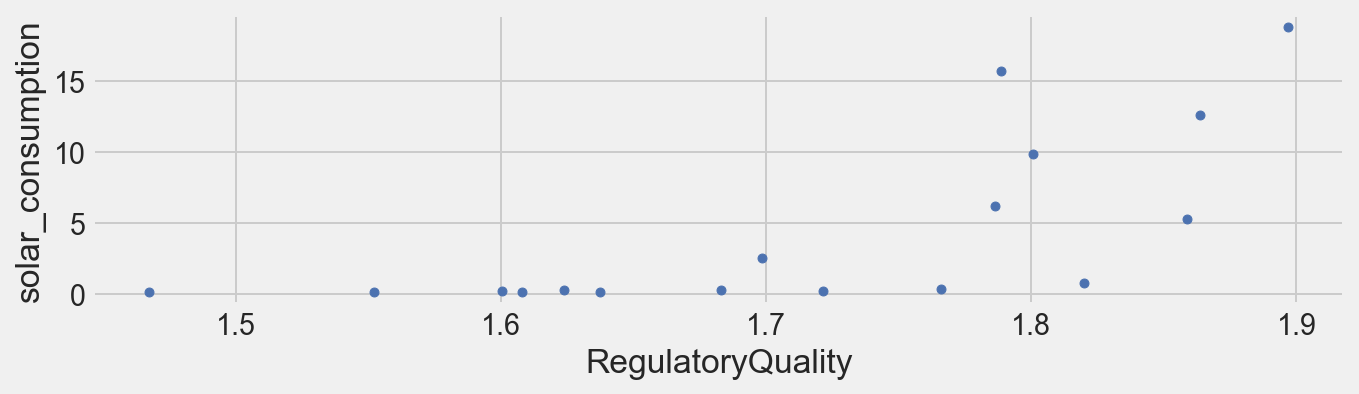

In [10]:
merged_full_dataset.plot.scatter(x='RegulatoryQuality', y='solar_consumption')
data = merged_full_dataset[['RegulatoryQuality', 'solar_consumption']]

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut

dataset = data.values
X = dataset[:,0][:, np.newaxis]
Y = dataset[:,1]

model = LinearRegression()

# selection = KFold(n_splits=2)
selection = LeaveOneOut()
results = cross_val_score(model, X, Y, cv=selection)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Baseline: nan (nan) MSE


In [17]:
model.fit(X, Y)
y_pred = model.predict(X)

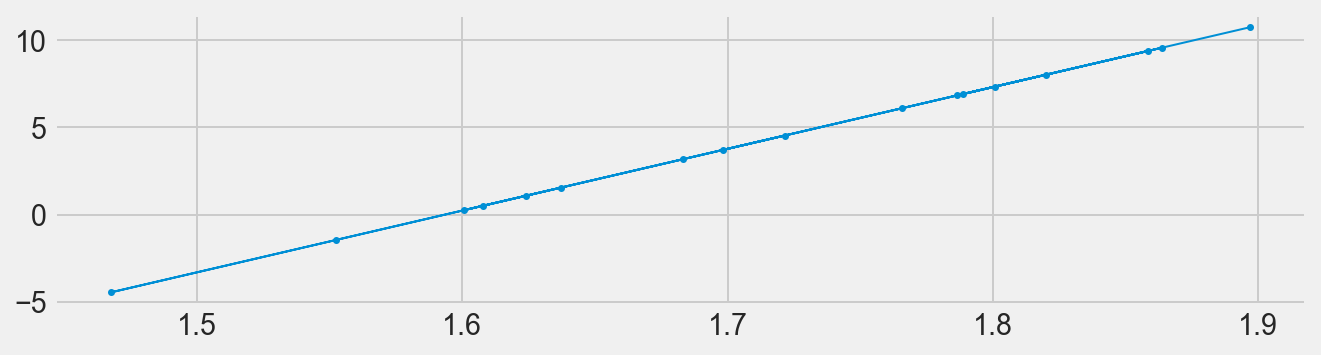

In [18]:
plt.plot(X, y_pred)

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(1000, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1000, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
# import xgboost as xgb
# param = {'max_depth':10, 
#          'subsample':1,
#          'min_child_weight':0.5,
#          'eta':0.3, 
#          'num_round':1000, 
#          'seed':1,
#          'silent':0,
#          'eval_metric':'rmse'}